In [1]:
# https://wikidocs.net/13969 << gc관련. 메모리 관리 관련
# https://velog.io/@ednadev/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%A0%95%EA%B7%9C%ED%91%9C%ED%98%84%EC%8B%9D%EA%B3%BC-re%EB%AA%A8%EB%93%88 << re관련. 정규표현식 관련

# https://dacon.io/competitions/official/235687/codeshare/2108?page=1&dtype=recent&ptype=pub

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import random
import lightgbm as lgb
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ex6 = 랜덤포레스트분류
# ex5 = gru 10층
# ex4 = gru 5층
# ex3 = lightgbm
### 위의 것들은 다 퀄리티+에러데이터. 
### ex3 이 제일 높게 나옴

In [3]:
import os

PATH = 'd:/Programming/2021.01.데이콘_LGai/data/'

for dirname, _, filenames in os.walk(PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

d:/Programming/2021.01.데이콘_LGai/data/sample_submission.csv
d:/Programming/2021.01.데이콘_LGai/data/test_err_data.csv
d:/Programming/2021.01.데이콘_LGai/data/test_quality_data.csv
d:/Programming/2021.01.데이콘_LGai/data/train_err_data.csv
d:/Programming/2021.01.데이콘_LGai/data/train_problem_data.csv
d:/Programming/2021.01.데이콘_LGai/data/train_quality_data.csv


In [4]:
train_err  = pd.read_csv(PATH+'train_err_data.csv', thousands=',')
train_quality  = pd.read_csv(PATH+'train_quality_data.csv', thousands=',')
train_problem  = pd.read_csv(PATH+'train_problem_data.csv', thousands=',')

test_err  = pd.read_csv(PATH+'test_err_data.csv', thousands=',')
test_quality  = pd.read_csv(PATH+'test_quality_data.csv', thousands=',')

In [53]:
train_df = pd.read_csv('d:/Programming/2021.01.데이콘_LGai/train1_df.csv', thousands=',')
test_df = pd.read_csv('d:/Programming/2021.01.데이콘_LGai/test1_df.csv', thousands=',')

<AxesSubplot:>

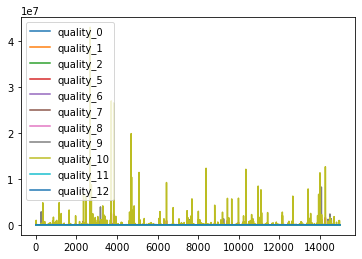

In [11]:
train_df[train_df.columns[1:12]].plot()

<AxesSubplot:>

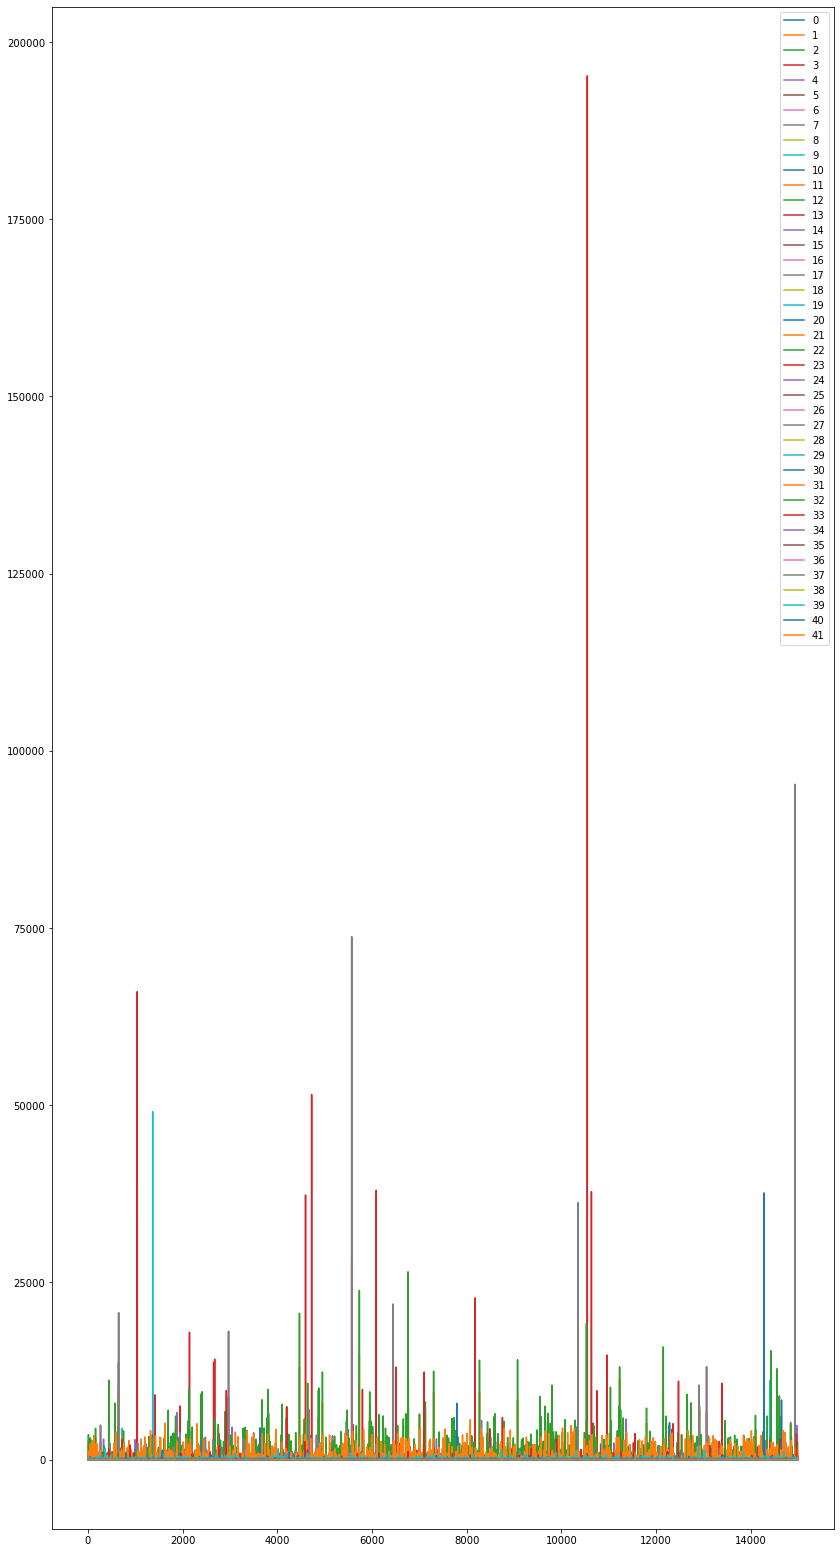

In [18]:
train_df[train_df.columns[12:-1]].plot()

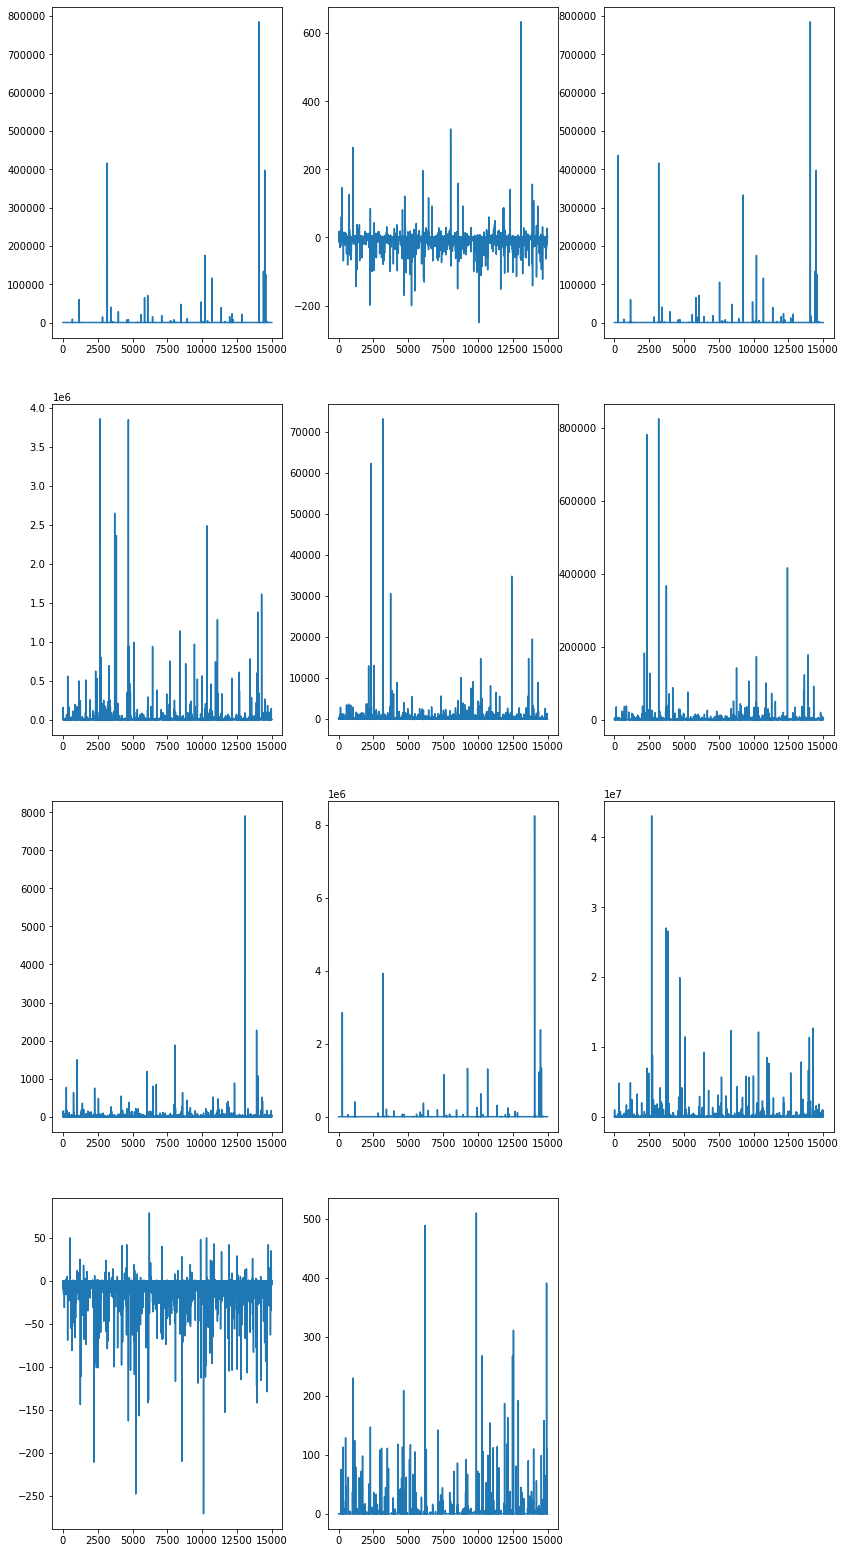

In [15]:
plt.rcParams["figure.figsize"] = (14,28)

for i in range(len(train_df.columns[1:12])):
    plt.subplot(4,3,i+1)
    train_df[train_df.columns[i+1]].plot()

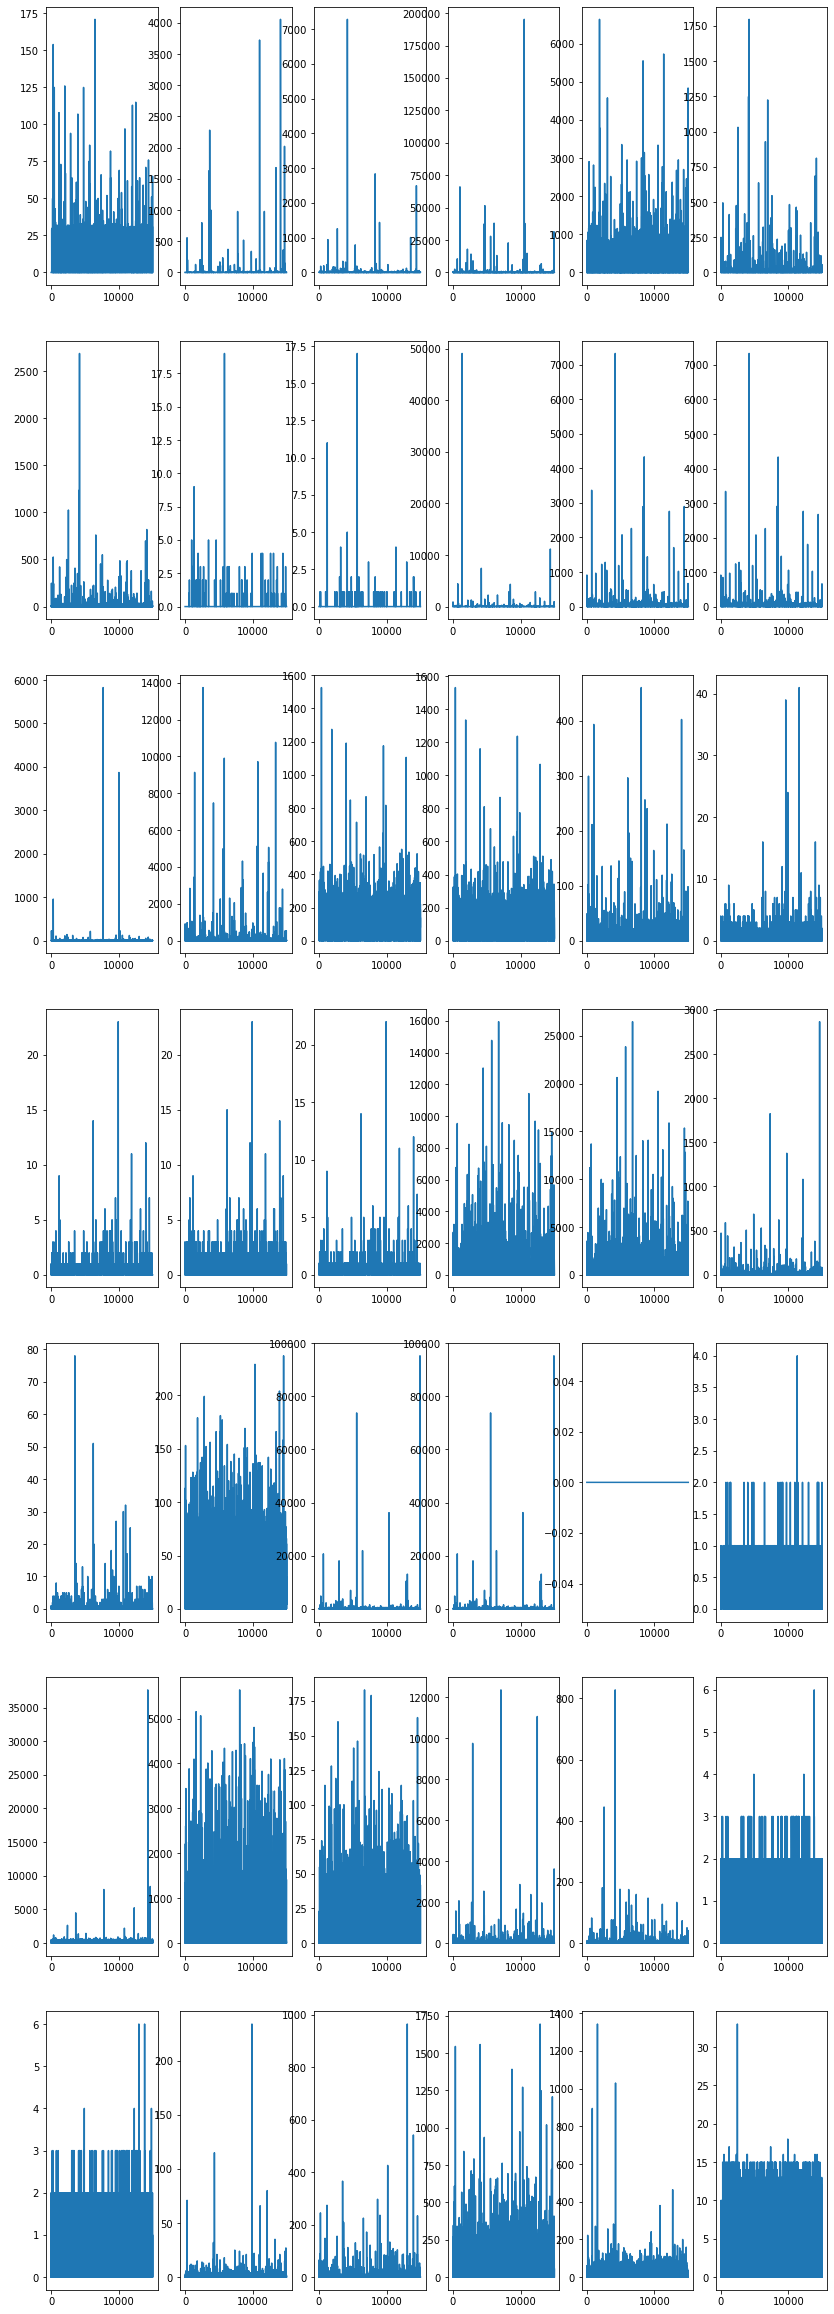

In [21]:
plt.rcParams["figure.figsize"] = (14,42)

for i in range(len(train_df.columns[12:-1])):
    plt.subplot(7,6,i+1)
    train_df[train_df.columns[i+12]].plot()

In [29]:
train_df

,user_id,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,...,33,34,35,36,37,38,39,40,41,y
0,10000,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,1.0,1.0,0.0,0.0,113.0,56.0,1.0,1.0
2,10002,1.0,-1.0,0.0,30.0,45.0,96.0,0.0,2.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,0.0,17.0,1.0,0.0,0.0
4,10004,-1.0,-1.0,-1.0,3.0,86.0,174.0,0.0,0.0,14.0,...,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24995,-2.0,-2.0,-2.0,3.0,-2.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,4.0,0.0
14996,24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,24997,-1.0,-1.0,-1.0,16.0,-1.0,0.0,0.0,0.0,91.0,...,17.0,0.0,1.0,1.0,0.0,0.0,58.0,8.0,5.0,1.0
14998,24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,1.0


In [44]:
train_df[train_df.columns[-15]]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14995    0.0
14996    0.0
14997    0.0
14998    0.0
14999    0.0
Name: 28, Length: 15000, dtype: float64

In [54]:
train_df.drop(columns=train_df.columns[-15], inplace=True)

In [55]:
train_df[train_df.columns[-15]]

0        1.0
1        0.0
2        2.0
3        0.0
4        0.0
        ... 
14995    0.0
14996    0.0
14997    0.0
14998    0.0
14999    0.0
Name: 27, Length: 15000, dtype: float64

In [56]:
X_train = train_df[train_df.columns[1:-1]].values
y_train = train_df[train_df.columns[-1]]

In [57]:
test_df

,user_id,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,...,32,33,34,35,36,37,38,39,40,41
0,30000,0.0,0.0,0.0,2.0,5.0,10.0,0.0,0.0,4.0,...,16.0,0.0,1.0,3.0,3.0,0.0,2.0,92.0,0.0,2.0
1,30001,-1.0,-1.0,-1.0,2561.0,-1.0,0.0,0.0,0.0,10245.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30002,-3.0,-3.0,-3.0,130.0,-3.0,0.0,0.0,0.0,384.0,...,16.0,0.0,0.0,1.0,1.0,0.0,14.0,113.0,1.0,2.0
3,30003,0.0,0.0,0.0,9.0,220.0,560.0,0.0,0.0,30.0,...,4.0,16.0,3.0,1.0,1.0,0.0,0.0,40.0,8.0,0.0
4,30004,-1.0,-1.0,-1.0,1.0,32.0,90.0,0.0,0.0,4.0,...,11.0,6.0,1.0,1.0,1.0,1.0,0.0,48.0,90.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,44994,-1.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,4.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,87.0,0.0
14995,44995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,1.0,0.0,1.0,1.0,0.0,0.0,12.0,17.0,0.0
14996,44996,-2.0,-2.0,-2.0,31.0,-2.0,0.0,0.0,0.0,109.0,...,12.0,1118.0,0.0,1.0,1.0,1.0,0.0,329.0,2.0,3.0
14997,44997,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,39.0,...,14.0,0.0,0.0,1.0,1.0,3.0,0.0,30.0,49.0,0.0


In [59]:
test_df[test_df.columns[-14]].unique()

array([0.])

In [60]:
test_df.drop(columns=test_df.columns[-14], inplace=True)

In [72]:
test_df

,user_id,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,...,32,33,34,35,36,37,38,39,40,41
0,30000,0.0,0.0,0.0,2.0,5.0,10.0,0.0,0.0,4.0,...,16.0,0.0,1.0,3.0,3.0,0.0,2.0,92.0,0.0,2.0
1,30001,-1.0,-1.0,-1.0,2561.0,-1.0,0.0,0.0,0.0,10245.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30002,-3.0,-3.0,-3.0,130.0,-3.0,0.0,0.0,0.0,384.0,...,16.0,0.0,0.0,1.0,1.0,0.0,14.0,113.0,1.0,2.0
3,30003,0.0,0.0,0.0,9.0,220.0,560.0,0.0,0.0,30.0,...,4.0,16.0,3.0,1.0,1.0,0.0,0.0,40.0,8.0,0.0
4,30004,-1.0,-1.0,-1.0,1.0,32.0,90.0,0.0,0.0,4.0,...,11.0,6.0,1.0,1.0,1.0,1.0,0.0,48.0,90.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,44994,-1.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,4.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,87.0,0.0
14995,44995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,1.0,0.0,1.0,1.0,0.0,0.0,12.0,17.0,0.0
14996,44996,-2.0,-2.0,-2.0,31.0,-2.0,0.0,0.0,0.0,109.0,...,12.0,1118.0,0.0,1.0,1.0,1.0,0.0,329.0,2.0,3.0
14997,44997,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,39.0,...,14.0,0.0,0.0,1.0,1.0,3.0,0.0,30.0,49.0,0.0


In [62]:
X_test = test_df[test_df.columns[1:]].values

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(15000, 52)
(15000,)
(14999, 52)


In [64]:
# Train
#-------------------------------------------------------------------------------------
# validation auc score를 확인하기 위해 정의
def f_pr_auc(probas_pred, y_true):
    labels=y_true.get_label()
    p, r, _ = precision_recall_curve(labels, probas_pred)
    score=auc(r,p) 
    return "pr_auc", score, True
#-------------------------------------------------------------------------------------
models     = []
recalls    = []
precisions = []
auc_scores = []
threshold = 0.5
# 파라미터 설정
params = {
            'boosting_type' : 'gbdt',
            'objective'     : 'binary',
            'metric'        : 'auc',
            'seed': 1015
            }

In [65]:
#-------------------------------------------------------------------------------------
# 5 Kfold cross validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in k_fold.split(X_train):

    # split train, validation set
    X = X_train[train_idx]
    y = y_train[train_idx]
    valid_x = X_train[val_idx]
    valid_y = y_train[val_idx]

    d_train= lgb.Dataset(X, y)
    d_val  = lgb.Dataset(valid_x, valid_y)
    
    #run traning
    model = lgb.train(
                        params,
                        train_set       = d_train,
                        num_boost_round = 1000,
                        valid_sets      = d_val,
                        feval           = f_pr_auc,
                        verbose_eval    = 20, 
                        early_stopping_rounds = 3
                       )
    
    # cal valid prediction
    valid_prob = model.predict(valid_x)
    valid_pred = np.where(valid_prob > threshold, 1, 0)
    
    # cal scores
    recall    = recall_score(    valid_y, valid_pred)
    precision = precision_score( valid_y, valid_pred)
    auc_score = roc_auc_score(   valid_y, valid_prob)

    # append scores
    models.append(model)
    recalls.append(recall)
    precisions.append(precision)
    auc_scores.append(auc_score)

    print('==========================================================')

[LightGBM] [Info] Number of positive: 3633, number of negative: 8367
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5878
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302750 -> initscore=-0.834237
[LightGBM] [Info] Start training from score -0.834237
Training until validation scores don't improve for 3 rounds
[20]	valid_0's auc: 0.803706	valid_0's pr_auc: 0.797814
Early stopping, best iteration is:
[26]	valid_0's auc: 0.807888	valid_0's pr_auc: 0.803672
[LightGBM] [Info] Number of positive: 4828, number of negative: 7172
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003839 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [66]:
print(np.mean(auc_scores))

0.7899729269060803


In [67]:
# 예측
pred_y_list = []
for model in models:
    pred_y = model.predict(X_test)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)

In [68]:
print(pred_ensemble)
print(len(pred_ensemble))

[[0.54227666]
 [0.2716084 ]
 [0.30307465]
 ...
 [0.36966201]
 [0.58875496]
 [0.33987909]]
14999


In [69]:
ex_7 = pd.read_csv(PATH+'sample_submission.csv')

In [70]:
ex_7['problem'] = pred_ensemble.reshape(-1)

In [71]:
ex_7.to_csv("ex_7.csv", index = False)
ex_7

,user_id,problem
0,30000,0.542277
1,30001,0.271608
2,30002,0.303075
3,30003,0.516379
4,30004,0.455502
...,...,...
14994,44994,0.338543
14995,44995,0.339140
14996,44996,0.369662
14997,44997,0.588755


In [73]:
ex_3 = pd.read_csv('d:/Programming/2021.01.데이콘_LGai/ex_3.csv')

In [74]:
ex_3

,user_id,problem
0,30000,0.542277
1,30001,0.271608
2,30002,0.303075
3,30003,0.516379
4,30004,0.455502
...,...,...
14994,44994,0.338543
14995,44995,0.339140
14996,44996,0.369662
14997,44997,0.588755


In [75]:
ex_7.problem

0        0.542277
1        0.271608
2        0.303075
3        0.516379
4        0.455502
           ...   
14994    0.338543
14995    0.339140
14996    0.369662
14997    0.588755
14998    0.339879
Name: problem, Length: 14999, dtype: float64

In [76]:
ex_3.problem

0        0.542277
1        0.271608
2        0.303075
3        0.516379
4        0.455502
           ...   
14994    0.338543
14995    0.339140
14996    0.369662
14997    0.588755
14998    0.339879
Name: problem, Length: 14999, dtype: float64

In [77]:
ex_3.problem == ex_7.problem

0         True
1        False
2         True
3        False
4         True
         ...  
14994    False
14995     True
14996     True
14997    False
14998     True
Name: problem, Length: 14999, dtype: bool